In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\15149\Desktop\New_folder\Python_project_movies\movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [8]:
Newdf = df.dropna(axis=0)  

print(Newdf.isnull().sum(),'\n')

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64 



In [9]:
Newdf.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
Newdf['budget']=Newdf['budget'].astype('int64')
Newdf['gross']=Newdf['gross'].astype('int64')

In [67]:
Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year,yearCorrected
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,1810,65
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,1593,75
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1822,52
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,1814,71
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,1601,74


In [26]:
Newdf['yearCorrected']=df['released'].astype(str).str[-20:-16]

In [66]:
Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year,yearCorrected
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,1810,65
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,1593,75
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1822,52
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,1814,71
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,1601,74


In [38]:
Newdf=Newdf.sort_values(by=['gross'],inplace=False,ascending= False)

In [32]:
pd.set_option('display.max_rows',None)

In [35]:
# find any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)
# Dropping any Duplicates

# df['company']=df['company'].drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<function matplotlib.pyplot.show(close=None, block=None)>

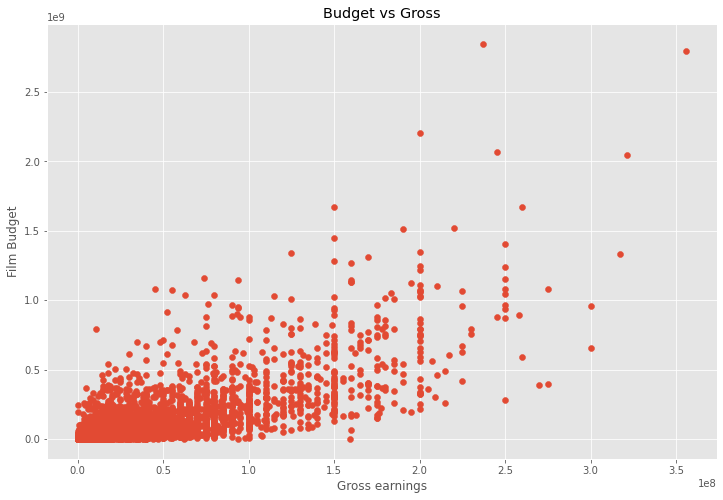

In [41]:
#Scatter Plot of budget Vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross earnings')
plt.ylabel('Film Budget')
plt.show

In [43]:
Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year,yearCorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"mber 18, 2009 (United States)",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"l 26, 2019 (United States)",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"mber 19, 1997 (United States)",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"mber 18, 2015 (United States)",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"l 27, 2018 (United States)",2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

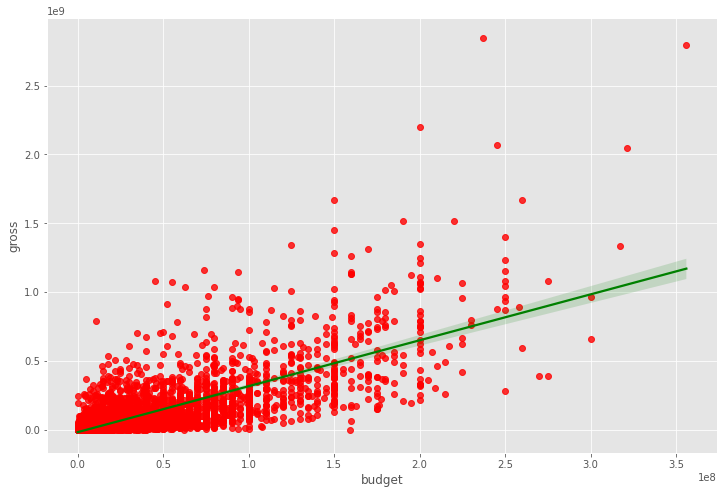

In [49]:
#Plot buget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=Newdf,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [50]:
Newdf.corr() #pearson,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [51]:
Newdf.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [52]:
Newdf.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


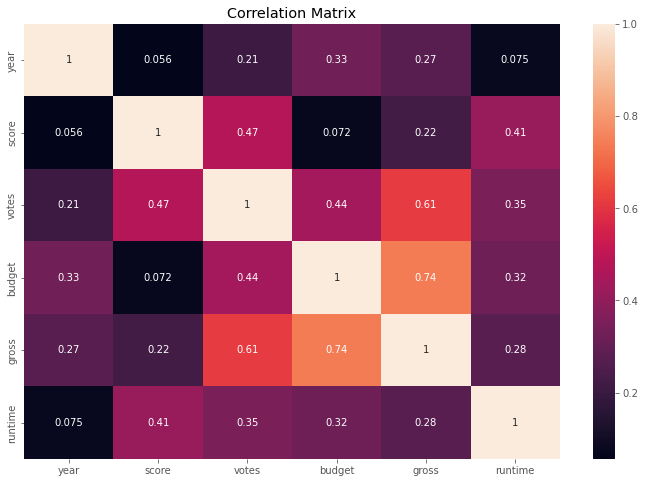

In [55]:
correlation_matrix=Newdf.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [65]:
df_numerised = Newdf
for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name]=df_numerised[col_name].astype('category')
        df_numerised[col_name]=df_numerised[col_name].cat.codes
        
df_numerised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year,yearCorrected
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,1810,65
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,1593,75
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1822,52
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,1814,71
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,1601,74


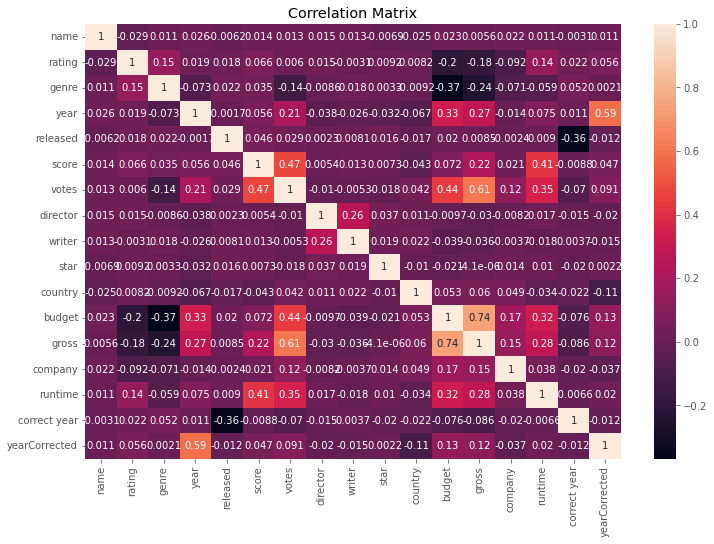

In [57]:
correlation_matrix=df_numerised.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [59]:
#unstacking

correlation_matrix = df_numerised.corr()
corr_pairs= correlation_matrix.unstack()
corr_pairs

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               year             0.025542
               released        -0.006152
               score            0.014450
               votes            0.012615
               director         0.015246
               writer           0.012880
               star            -0.006882
               country         -0.025490
               budget           0.023392
               gross            0.005639
               company          0.021697
               runtime          0.010850
               correct year    -0.003074
               yearCorrected    0.010879
rating         name            -0.029234
               rating           1.000000
               genre            0.147796
               year             0.019499
               released         0.018083
               score            0.065983
               votes            0.006031
               d

In [61]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

budget         genre           -0.368523
genre          budget          -0.368523
released       correct year    -0.362200
correct year   released        -0.362200
genre          gross           -0.244101
gross          genre           -0.244101
rating         budget          -0.203946
budget         rating          -0.203946
gross          rating          -0.181906
rating         gross           -0.181906
genre          votes           -0.135990
votes          genre           -0.135990
yearCorrected  country         -0.112459
country        yearCorrected   -0.112459
rating         company         -0.092357
company        rating          -0.092357
correct year   gross           -0.085544
gross          correct year    -0.085544
budget         correct year    -0.075698
correct year   budget          -0.075698
genre          year            -0.073167
year           genre           -0.073167
genre          company         -0.071334
company        genre           -0.071334
correct year   v

In [64]:
#high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr=sorted_pairs[(sorted_pairs)<1]
high_corr

budget         genre           -0.368523
genre          budget          -0.368523
released       correct year    -0.362200
correct year   released        -0.362200
genre          gross           -0.244101
gross          genre           -0.244101
rating         budget          -0.203946
budget         rating          -0.203946
gross          rating          -0.181906
rating         gross           -0.181906
genre          votes           -0.135990
votes          genre           -0.135990
yearCorrected  country         -0.112459
country        yearCorrected   -0.112459
rating         company         -0.092357
company        rating          -0.092357
correct year   gross           -0.085544
gross          correct year    -0.085544
budget         correct year    -0.075698
correct year   budget          -0.075698
genre          year            -0.073167
year           genre           -0.073167
genre          company         -0.071334
company        genre           -0.071334
correct year   v